In [61]:
import numpy as np
import scipy as sp
import itertools as it
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.animation import FuncAnimation

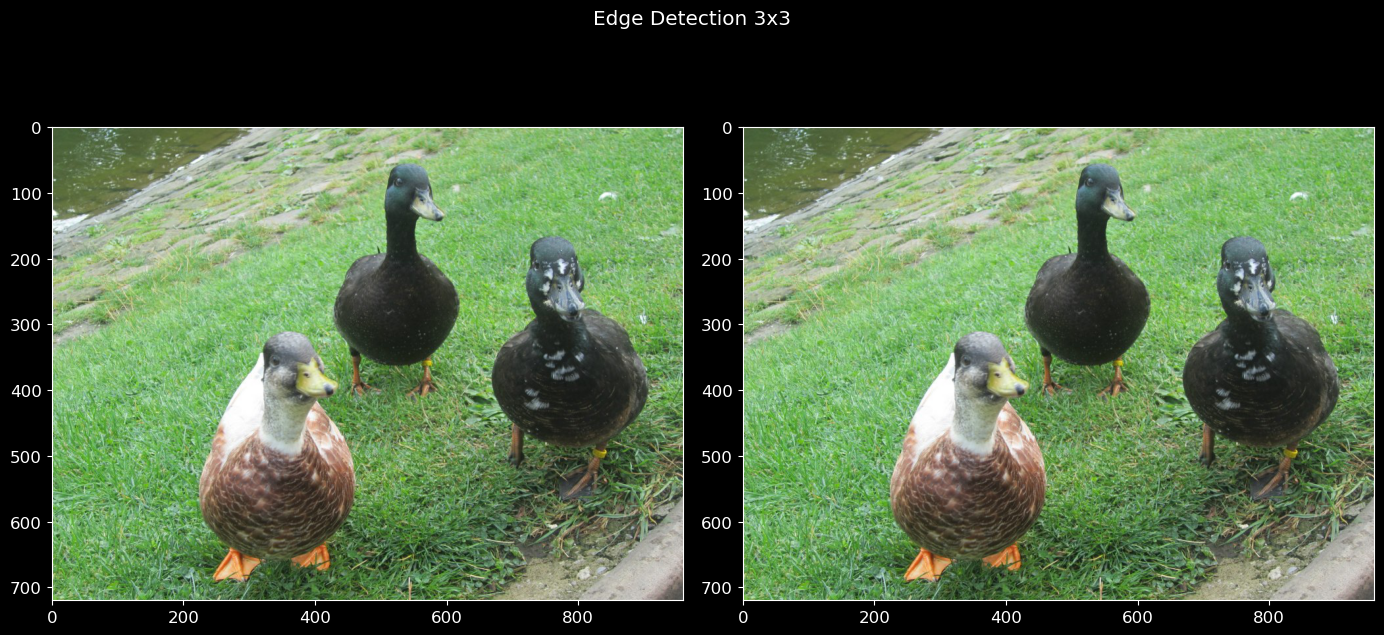

In [63]:

def RGB_convolve(image,kern):
    #Convolve and RGB image with a kernel Kern
    image2 = np.empty_like(image)
    for dim in range (image.shape[-1]):
        image2[:,:, dim] = sp.signal.convolve2d(image[:,:, dim],
                                                   kern,
                                                   mode ="same",
                                                   boundary = "symm")
    return image2


def RGB2RGBA(image, fill_value = 1):
    #Add alpha channel to RGB image
    image2 = np.copy(image)
    if image.shape[-1] >= 4:
        return image
        image2 = np.full(shape= (*image.shape[:-1],4),
                         fill_value= fill_value,
                         dtype= image.dtype)
        image2[:,:,:-1] = image/255.
    return image2

FPS  =30 #Frame per Second
T = 10 # Total
FTOTAL =FPS*T
plt.rcParams["figure.figsize"] = (14,7)

FNAME = "ducks.jpg"


KERNELS = {"Edge Detection 3x3": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
           "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])}


kernel_name = "Edge Detection 3x3"
kernel = KERNELS[kernel_name]
im_data = plt.imread(FNAME).astype(np.float64) / 255.0
im_filtered = RGB_convolve(im_data,kernel)
im_display = np.copy(im_data)

fig, (axL, axR) = plt.subplots(ncols = 2, tight_layout = True)
fig.suptitle(kernel_name)




#axL.imshow(im_data)
#axR.imshow(im_filtered)
#axR.imshow(im_display)

imL = axL.imshow(im_data)
#axR.imshow(im_filtered)
immR= axR.imshow(im_display)

indices = list(it.product(range(im_data.shape[0]), range(im_data.shape[1])))
Nic = int(len(indices)/FTOTAL)  # Number of increment 
def init_plot():
    axR.imshow(im_data)
    return(imR,)

def update_plot(frame):
    for i in range(frame, frame + Ninc):
        if i >= len(indices):
            break
        idx_x, idx_y = indices[i]
        im_display[idx_x, idx_y, :] = im_filtered[idx_x, idx_y, :]

    imR.set_data(im_display)
    return (imR,)


ani = FuncAnimation(fig, func=update_plot, init_func=init_plot, interval=1000/FPS,
                    frames=range(0, len(indices), Ninc), repeat=False, blit=True)


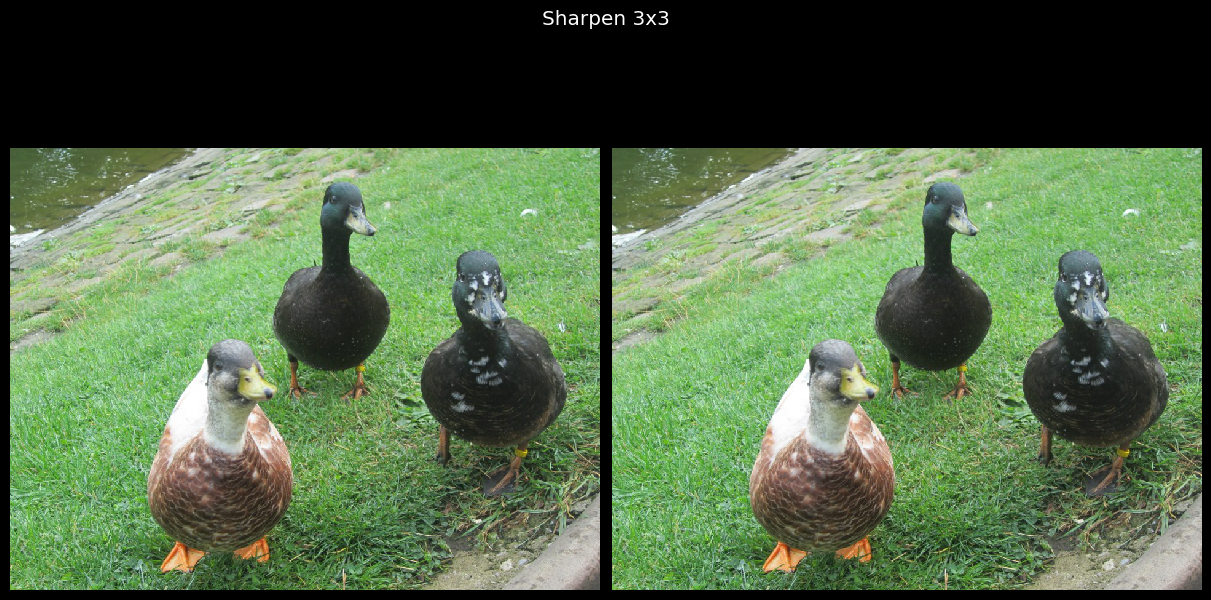

In [65]:

plt.style.use('dark_background')  # comment out for "light" theme
plt.rcParams["font.size"] = 12

plt.rcParams["figure.figsize"] = (12, 7)


def RGB_convolve(im1, kern):
    im2 = np.empty_like(im1)
    for dim in range(im1.shape[-1]):  # loop over rgb channels
        im2[:, :, dim] = sp.signal.convolve2d(im_data[:, :, dim],
                                              kern,
                                              mode="same",
                                              boundary="symm")
    return im2


def RGB2RGBA(arr, fill_value=1):
  # Add an alpha channel to an RGB array
    if arr.shape[-1] >= 4:
        return arr
    arr2 = np.full(shape=(*arr.shape[:-1], 4),
                   fill_value=fill_value,
                   dtype=arr.dtype)
    arr2[:, :, :-1] = arr/255.
    return arr2


# FNAME = "blurryA.png"
FNAME = "ducks.jpg"

T = 10  # seconds
FPS = 30
FTOTAL = T*FPS  # total number of frames

KERNELS = {"Edge Detection 3x3": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
           "Sharpen 3x3": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])}

kernel_name = "Sharpen 3x3"
# kernel_name = "Edge Detection 3x3"
kernel = KERNELS[kernel_name]

im_data = RGB2RGBA(plt.imread(FNAME).astype(float))

im_filtered = RGB_convolve(im_data, kernel)
im_filtered[:, :, -1] = 1

im_display = np.copy(im_data)

# im_filtered[:,:,:-1] -= np.min(np.sum(im_filtered[:,:,:-1], axis = 2))

# Normalise to white
# im_filtered[:,:,:-1] -= np.min(im_filtered[:,:,:-1])
# im_filtered[:,:,:-1] /= 1/3 * np.max(np.sum(im_filtered[:,:,:-1], axis = 2))

# Normalise to individual RGB

# im_filtered[:,:,:-1] -= np.min(im_filtered[:,:,:-1])
# im_filtered[:,:,:-1] /= np.max(im_filtered[:,:,:-1])

fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
fig.suptitle(kernel_name)
imL = axL.imshow(im_data, interpolation="none")  # remove interpolation=...
imR = axR.imshow(im_data, interpolation="none")  # remove interpolation=...
axR.set_xlim(axL.get_xlim()), axR.set_ylim(axL.get_ylim())
axL.axis('off'), axR.axis('off')
imR.set_clim([0, 1])

indices = list(it.product(
    range(im_filtered.shape[0]), range(im_filtered.shape[1])))

Ninc = int(len(indices) / FTOTAL)  # increment


def init_plot():
    # imR.set_data(im_data)
    return (imR,)


def update_plot(frame):
    for i in range(frame, frame + Ninc):
        if i >= len(indices):
            break
        idx_x, idx_y = indices[i]
        im_display[idx_x, idx_y, :] = im_filtered[idx_x, idx_y, :]

    imR.set_data(im_display)
    return (imR,)


if __name__ == "__main__":

    ani = FuncAnimation(fig, func=update_plot, init_func=init_plot, interval=1000/FPS,
                        frames=range(0, len(indices), Ninc), repeat=False, blit=True)
    plt.show()